# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing (star). 
* canton: swiss canton.
* class_level: school year in swiss system.
* study: boolean variable. True if the student participated in the study.
* class_id: identifier of student’s class (only for the students in the experiment)


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* event_date: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).

### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* solution: solution to question.
* type: type of question that was answered. 
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).
* challenge: (boolean) whether the transaction was part of a challenge or not. Professors can create challenges containing different documents
* challenge_id: unique identifier of challenges. The same challenge can be done by multiple students. The pre-test and post-test in the study were designed like challenges.
* challenge_order: within the challenge, the order of the questions. The order matters because sometimes the questions were adapted depending on the student’s knowledge.
* challenge_name: name given to the challenges. 

## Useful Metadata Files
* [Data description](https://docs.google.com/document/d/1NPFNwi79JddrxZM-CpltH5nHro5btHRSNnYcAGj7Y0A/edit?usp=sharing)


In [3]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let us first load the data and read it !

In [4]:
# Import the tables of the data set as dataframes.


# DATA_DIR = './../../../data/Lernnavi' #You many change the directory
DATA_DIR = './' #You many change the directory



users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

In [6]:
users.head(10)

,user_id,gender,canton,class_level,study,class_id
0,387604,NaN,NaN,NaN,False,NaN
1,387605,NaN,NaN,NaN,False,NaN
2,387608,NaN,NaN,NaN,True,9Q2M7
3,387613,NaN,NaN,NaN,False,NaN
4,387615,MALE,SG,Gymnasium - 3. Jahr,False,NaN
5,387643,NaN,NaN,NaN,False,NaN
6,387644,NaN,NaN,NaN,False,NaN
7,387650,NaN,NaN,NaN,True,FTC4E
8,387655,FEMALE,SG,ISME - Passerelle,False,NaN
9,387666,MALE,SG,Gymnasium - 2. Jahr,False,NaN


In [7]:
print(users.shape)

(30929, 6)


In [9]:
transactions.shape

(2134759, 21)

In [10]:
events.shape

(11193171, 13)

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

In [34]:
users.describe(include='object')


,gender,canton,class_level,class_id
count,26712,26698,26698,365
unique,3,24,84,19
top,FEMALE,ZH,Gymnasium - 1. Jahr,6AZ2V
freq,15342,6081,6023,25


In [40]:
events.describe(include='object')

,event_date,category,action,event_type,transaction_token,tracking_data
count,11193171,11193171,11193171,11193171,5324076,6185516
unique,11128226,10,31,2,2090500,1974590
top,2021-11-10 10:58:09.259,USER_SESSION,PAGE_VISIT,VIEW,f0715577-5ec5-4054-a232-0986d9d65868,"{""text"": ""Jetzt starten"", ""title"": ""Go To Dash..."
freq,5,3947517,2113982,6858450,154,63800


In [41]:
transactions.describe(include='object')

,transaction_token,document_id,evaluation,input,start_time,commit_time,user_agent,solution,type,challenge_name
count,2134759,2134759,1401007,1401532,2134759,1562642,1851330,1401532,1401532,379977
unique,2134759,4799,3,226763,2134322,1562309,2173,9201,18,1711
top,88fdcaad-f73b-46a2-b561-d262f2441442,153kgQ6uVpd7YKFVnDhbat,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""1""...",2021-09-23 12:46:03.407000000,2022-10-20 09:26:56.264000000,unknown,"{""type"": ""SOLUTION_FIELD""}",MULTIPLE_CHOICE,Bruchterme
freq,1,29779,668991,34858,2,3,866122,79858,306214,4934


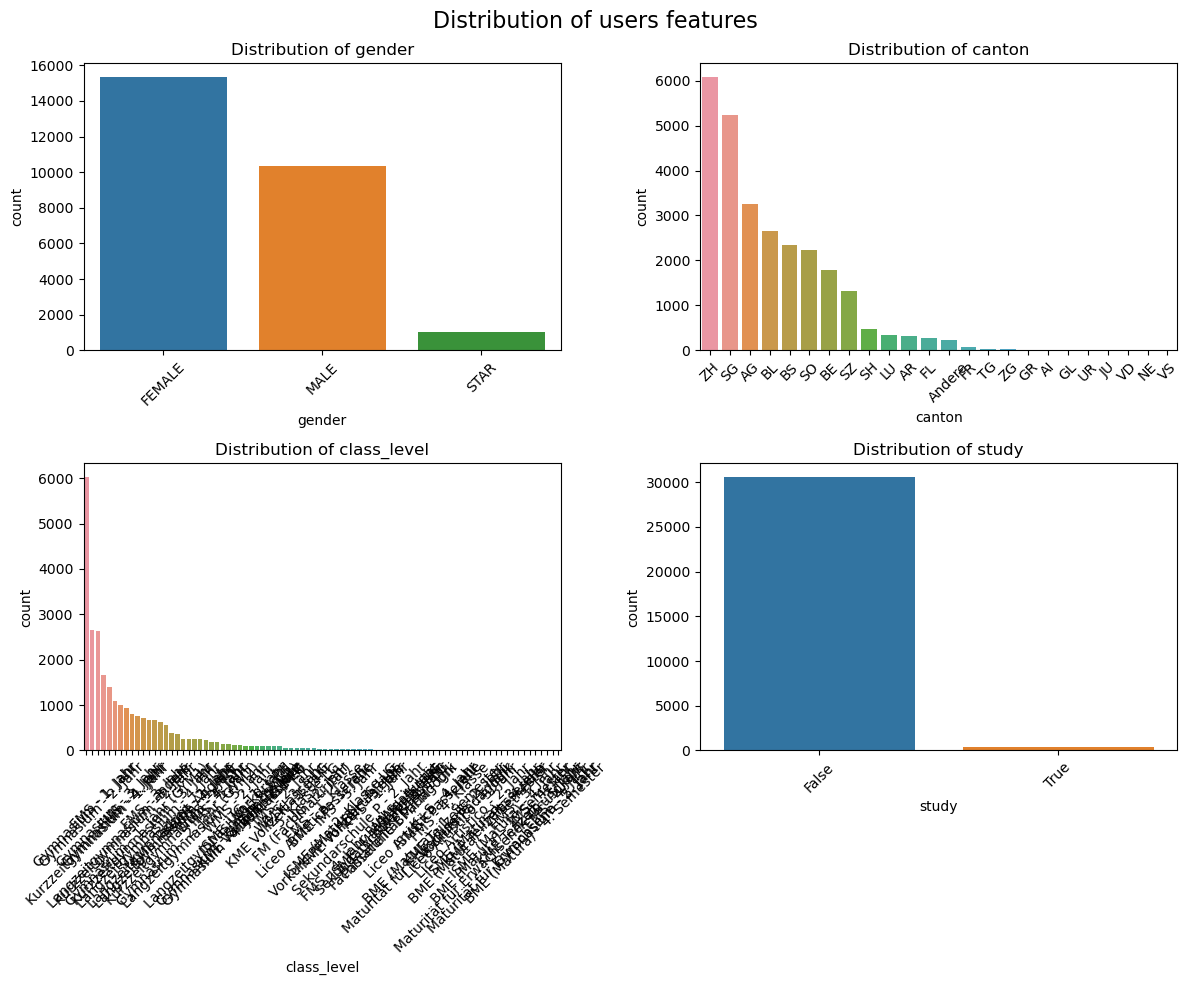

In [51]:
def plot_selected_features(df):
    """
    Plots selected categorical and boolean features in a single figure.
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
    """    
    df = df[['gender', 'canton', 'class_level', 'study']].copy()  # Keep only relevant features
    
    # Define subplot grid size
    num_features = len(df.columns)
    cols = 2  # Number of columns in the plot (for better visualization)
    rows = (num_features // cols) + (num_features % cols > 0)  # Calculate rows dynamically
    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(8, 4 * rows))
    # Flatten axes if there are multiple rows
    axes = axes.flatten() if num_features > 1 else [axes]
    
    # Plot each feature
    for i, col in enumerate(df.columns):
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].tick_params(axis='x', rotation=45)  

    # Remove empty subplots if necessary
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    fig.suptitle("Distribution of users features", fontsize=16)
    fig.tight_layout()
    plt.show()
plot_selected_features(users)

In [36]:
users.gender.value_counts()

gender
FEMALE    15342
MALE      10364
STAR       1006
Name: count, dtype: int64

We can already see some outliers in the class levels, let's remove all the people that didn't participated in the study and plot again!

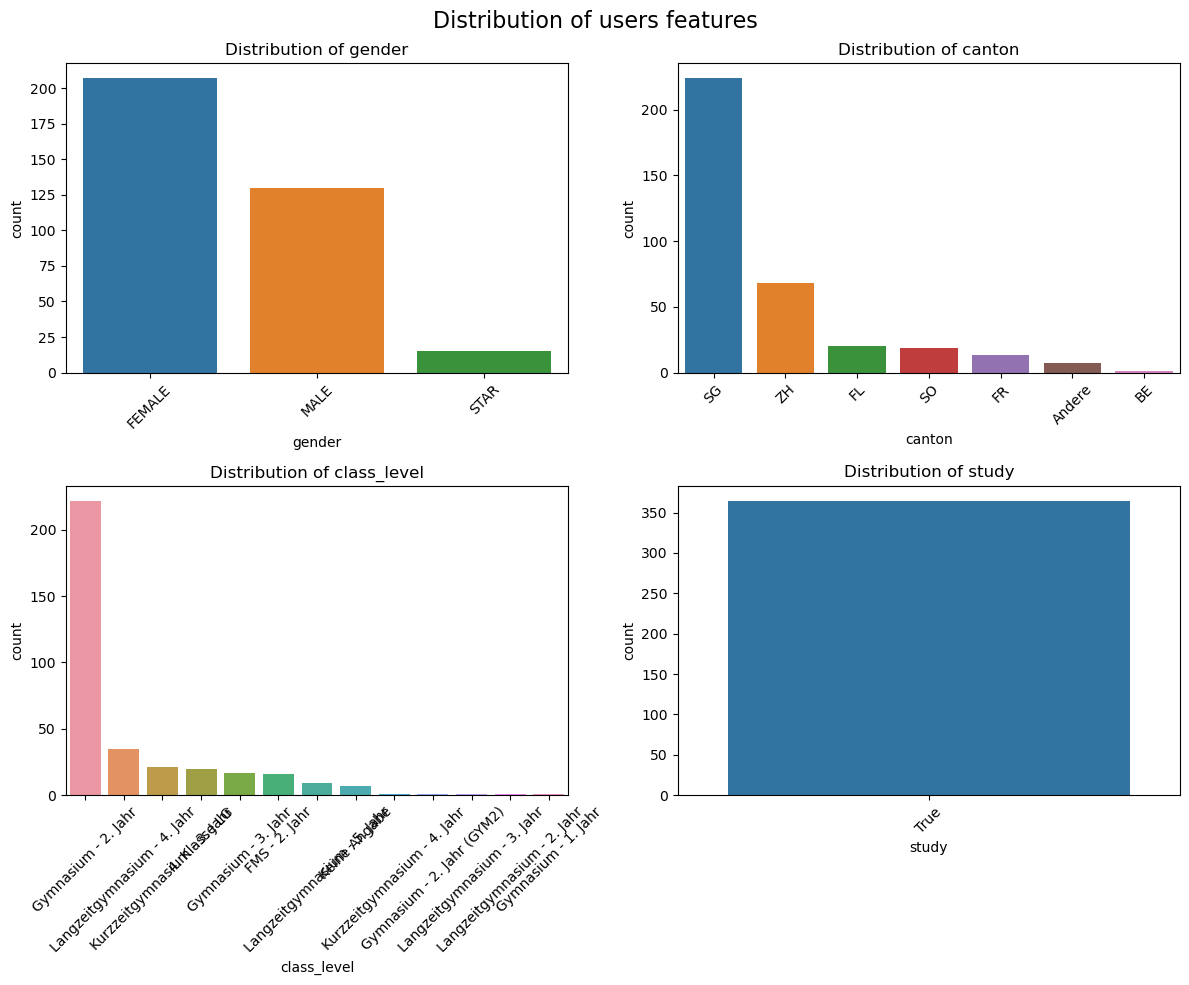

In [49]:
plot_selected_features(users[users.study == True])

In [50]:
events.columns

Index(['event_id', 'user_id', 'event_date', 'category', 'action', 'event_type',
       'transaction_token', 'tracking_data', 'session_id', 'topic_id',
       'session_closed', 'session_type', 'session_accepted'],
      dtype='object')

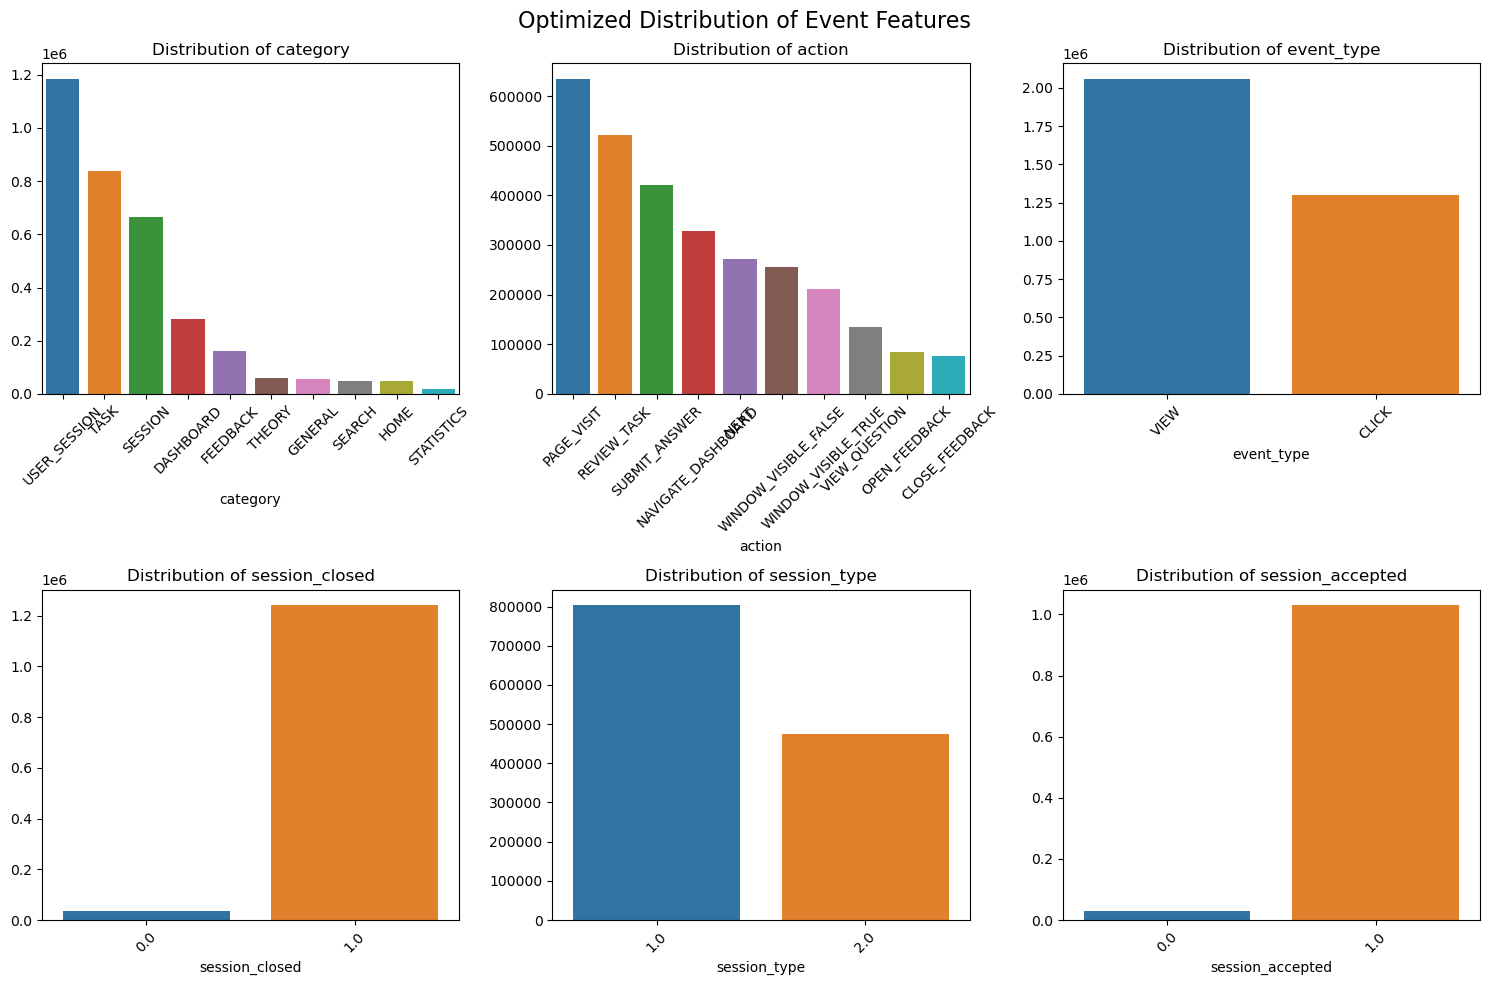

In [5]:
def plot_selected_features_events(df):
    """
    Optimized function to plot selected categorical and boolean features efficiently.
    
    Parameters
    ----------
    df : DataFrame
         Containing all event data.
    """    
    # Sample data to speed up processing (adjust fraction as needed)
    df_sampled = df.sample(frac=0.3, random_state=42)  # Use only 10% of data

    # Define relevant features to plot
    selected_features = ['category', 'action', 'event_type', 'session_closed', 'session_type', 'session_accepted']
    
    # Define subplot grid
    num_features = len(selected_features)
    cols = 3
    rows = (num_features // cols) + (num_features % cols > 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    # Flatten axes array
    axes = axes.flatten()

    # Plot each feature
    for i, col in enumerate(selected_features):
        # Compute top 10 categories for better visualization
        top_categories = df_sampled[col].value_counts().nlargest(10)
        
        sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
    # Remove extra subplots if not needed
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Optimized Distribution of Event Features", fontsize=16)
    fig.tight_layout()
    plt.show()

plot_selected_features_events(events)

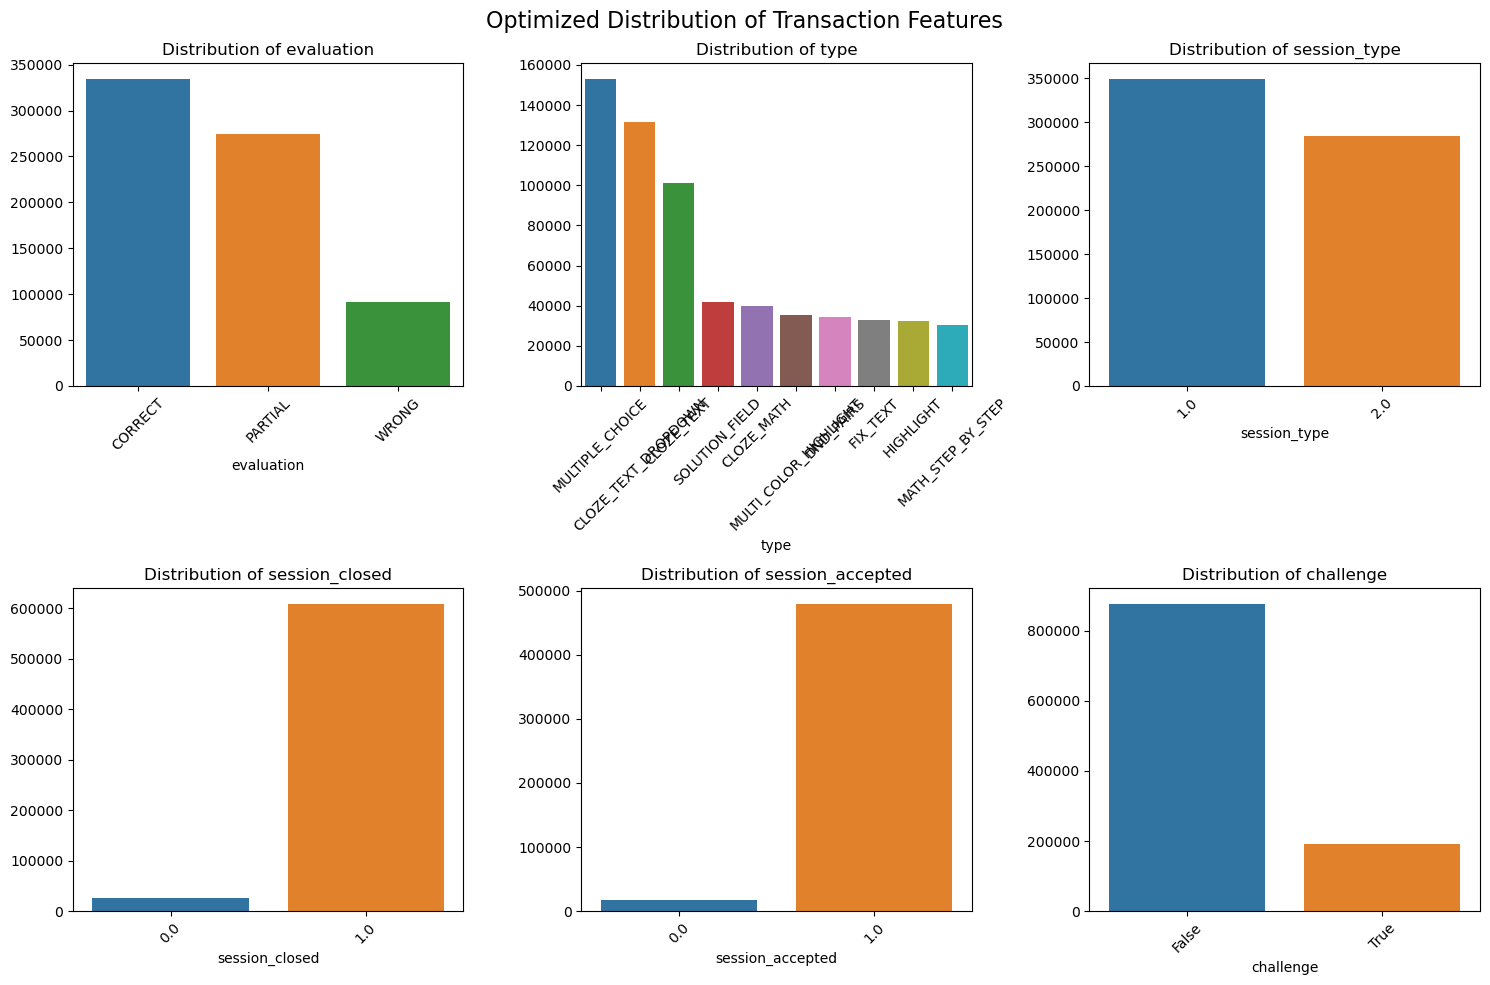

In [7]:
def plot_selected_features_transactions(df):
    """
    Optimized function to plot selected categorical and boolean features efficiently.
    
    Parameters
    ----------
    df : DataFrame
         Containing all transaction data.
    """    
    # Sample only 10% of data for faster processing
    df_sampled = df.sample(frac=0.5, random_state=42)  # Adjust fraction as needed

    # Define relevant features to plot
    selected_features = ['evaluation', 'type', 'session_type', 'session_closed', 
                         'session_accepted', 'challenge']
    
    # Define subplot grid
    num_features = len(selected_features)
    cols = 3
    rows = (num_features // cols) + (num_features % cols > 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    # Flatten axes array
    axes = axes.flatten()

    # Plot each feature
    for i, col in enumerate(selected_features):
        # Compute top 10 categories for better visualization
        top_categories = df_sampled[col].value_counts().nlargest(10)
        
        sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
    # Remove extra subplots if not needed
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Optimized Distribution of Transaction Features", fontsize=16)
    fig.tight_layout()
    plt.show()

plot_selected_features_transactions(transactions)

#### a) How many distinct participants do we have in the transactions table?


In [39]:
transactions['user_id'].nunique()

22470

There are 22470 unique participants in the transaction table

#### b) How many transactions did each user do? Please provide a visualization and discuss the distribution.

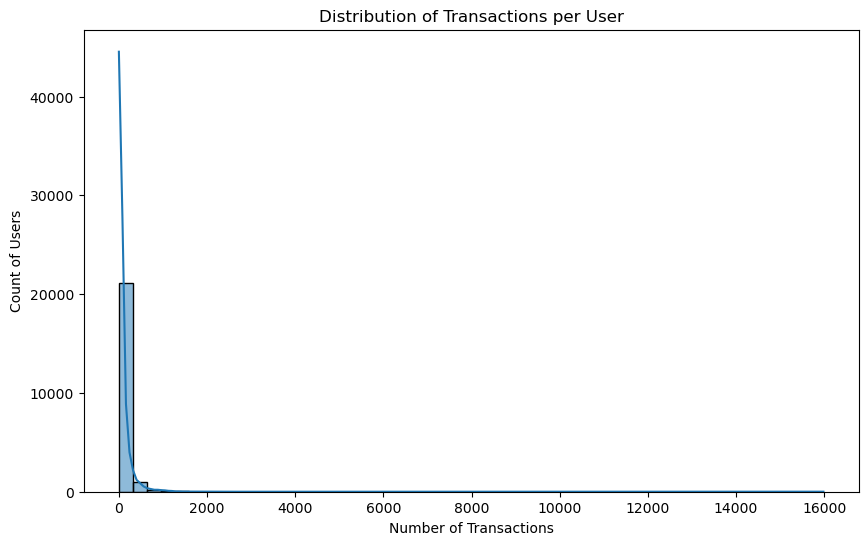

count    22470.000000
mean        95.004851
std        189.669706
min          1.000000
25%         16.000000
50%         44.000000
75%        105.000000
max      15982.000000
Name: transaction_count, dtype: float64


In [15]:
def plot_transactions_per_user(df):
    """
    Plots the distribution of the number of transactions per user.
    
    Parameters
    ----------
    df : DataFrame
         Containing transaction data with a `user_id` column.
    """    
    # Group by user_id and count transactions per user
    user_transactions = df.groupby('user_id').size().reset_index(name='transaction_count')

    # Plot histogram
    plt.figure(figsize=(10,6))
    sns.histplot(user_transactions['transaction_count'], bins=50, kde=True)
    plt.title("Distribution of Transactions per User")
    plt.xlabel("Number of Transactions")
    plt.ylabel("Count of Users")
    plt.show()

    # Print basic statistics
    print(user_transactions['transaction_count'].describe())

plot_transactions_per_user(transactions)

*The distribution is right-skewed with a heavy tail, indicating that most users made very few transactions, while a small group conducted significantly more. This suggests that Learnnavi is not uniformly utilized, likely because only a limited number of users actively participated in the study. The low mean (95) compared to the max (15,982) and high standard deviation (189.67) indicate that a few users dominate activity. With a median of just 44 transactions, engagement is highly uneven, with clear outliers..*


#### c) Which are the 8 most popular event actions? Please provide a visualization of the frequency of the top 8 event actions.

Hint: See actions in table events.

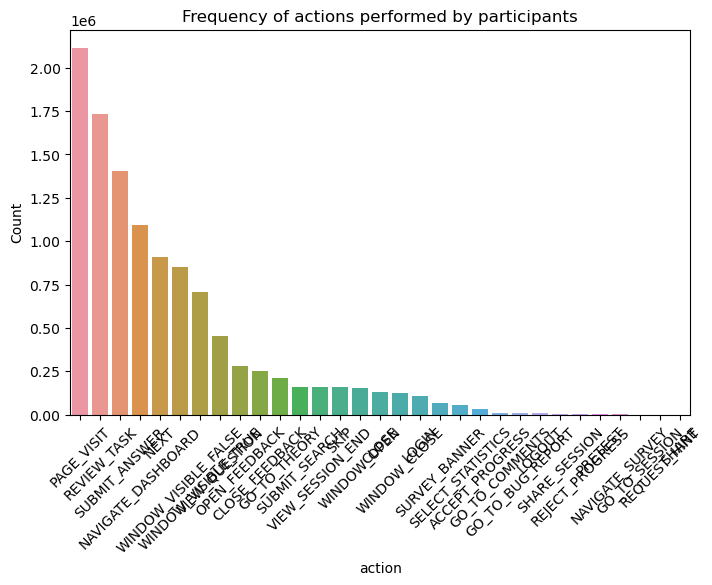

In [18]:
action = events.action.copy()
plt.figure(figsize=(8,5))
sns.countplot(data=events, x=action, order=action.value_counts().index)
plt.title(f"Frequency of actions performed by participants")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.ylabel("Count")
plt.show()

In [23]:
actions = events.action.unique()
print(f"Unique actions: {actions}")

Unique actions: ['VIEW_QUESTION' 'SUBMIT_ANSWER' 'NEXT' 'GO_TO_THEORY' 'SKIP' 'CLOSE'
 'VIEW_SESSION_END' 'REVIEW_TASK' 'GO_TO_BUG_REPORT' 'SHARE'
 'ACCEPT_PROGRESS' 'GO_TO_COMMENTS' 'REJECT_PROGRESS' 'NAVIGATE_DASHBOARD'
 'LOGIN' 'LOGOUT' 'REQUEST_HINT' 'PAGE_VISIT' 'WINDOW_OPEN'
 'WINDOW_VISIBLE_TRUE' 'WINDOW_VISIBLE_FALSE' 'WINDOW_CLOSE'
 'SELECT_STATISTICS' 'SUBMIT_SEARCH' 'GO_TO_SESSION' 'SHARE_SESSION'
 'OPEN_FEEDBACK' 'CLOSE_FEEDBACK' 'SURVEY_BANNER' 'PRETEST'
 'NAVIGATE_SURVEY']


In [20]:
top_8_actions = events['action'].value_counts().nlargest(8) 
print('The 8 most populare event actions are :' , top_8_actions)

The 8 most populare event actions are : action
PAGE_VISIT              2113982
REVIEW_TASK             1734632
SUBMIT_ANSWER           1404142
NAVIGATE_DASHBOARD      1093791
NEXT                     907521
WINDOW_VISIBLE_FALSE     851634
WINDOW_VISIBLE_TRUE      705679
VIEW_QUESTION            451981
Name: count, dtype: int64


*The 8 most popular actions are PAGE_VISIT, REVIEW_TASK, SUBMIT_ANSWER, NAVIGATE_DASHBOARD, NEXT, WINDOW_VISIBLE_FALSE, WINDOW_VISIBLE_TRUE, and VIEW_QUESTION. As assumptions we could say that PAGE_VISIT is the most common as users navigate the platform, REVIEW_TASK before SUBMIT_ANSWER suggests careful submission*

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_pages_visited, num_feedback, percentage_correct, num_clicks]``


The features are defined as follows:

- **num_pages_visited**: total number of pages a student visited 

- **num_feedback**: total number of times the student opened the feedback

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_clicks**: total number of click events (hint: event_type = CLICK)

In [71]:
num_pages_visited = events[events.action == 'PAGE_VISIT'].groupby('user_id').agg(num_pages_visited=('user_id', 'count'))
num_feedback = events[events.action == 'OPEN_FEEDBACK'].groupby('user_id').agg(num_feedback=('user_id', 'count'))

transaction_correct = transactions[transactions.evaluation == 'CORRECT'].groupby('user_id').agg(correct=('user_id', 'count'))
transaction_partial = transactions[transactions.evaluation == 'PARTIAL'].groupby('user_id').agg(partial_correct=('user_id', 'count'))
total_answers = transactions.groupby('user_id').agg(total=('user_id', 'count'))

percentage_correct = total_answers.merge(transaction_correct, on='user_id', how='left').merge(transaction_partial, on='user_id', how='left').fillna(0)
percentage_correct['percentage_correct'] = (percentage_correct['correct'] + 0.5 * percentage_correct['partial_correct']) / percentage_correct['total'] * 100
percentage_correct = percentage_correct[['percentage_correct']]

num_clicks = events[events.event_type == 'CLICK'].groupby('user_id').agg(num_clicks=('user_id', 'count'))

user_df = users[['user_id', 'gender']].copy()
user_df = user_df.merge(num_pages_visited, on='user_id', how='left').merge(num_feedback, on='user_id', how='left').merge(percentage_correct, on='user_id', how='left').merge(num_clicks, on='user_id', how='left').fillna(0)


In [72]:
user_df

,user_id,gender,num_pages_visited,num_feedback,percentage_correct,num_clicks
0,387604,0,1341.0,46.0,29.550827,1408.0
1,387605,0,862.0,78.0,28.319502,959.0
2,387608,0,716.0,11.0,26.869806,516.0
3,387613,0,37.0,0.0,33.333333,38.0
4,387615,MALE,211.0,1.0,28.750000,109.0
...,...,...,...,...,...,...
30924,432018,MALE,0.0,0.0,0.000000,0.0
30925,432020,MALE,27.0,4.0,20.000000,40.0
30926,432021,FEMALE,0.0,0.0,0.000000,0.0
30927,432022,FEMALE,0.0,0.0,0.000000,0.0


In [73]:
user_df.gender.value_counts()

gender
FEMALE    15342
MALE      10364
0          4217
STAR       1006
Name: count, dtype: int64

b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_pages_visited, num_feedback, percentage_correct, num_clicks) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [74]:
# We start with descriptive analysis of the data
df = user_df.copy()
numerical = df.describe(include= ['float64'])
categorical = df.describe(include= ['object'])
stats = pd.concat([numerical, categorical])
stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]
stats


,num_pages_visited,num_feedback,percentage_correct,num_clicks,gender
mean,68.349510,9.105758,29.787825,140.150700,NaN
std,121.530386,30.497469,23.804976,291.079366,NaN
50%,30.000000,0.000000,33.870968,48.000000,NaN
unique,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,FEMALE
freq,NaN,NaN,NaN,NaN,15342


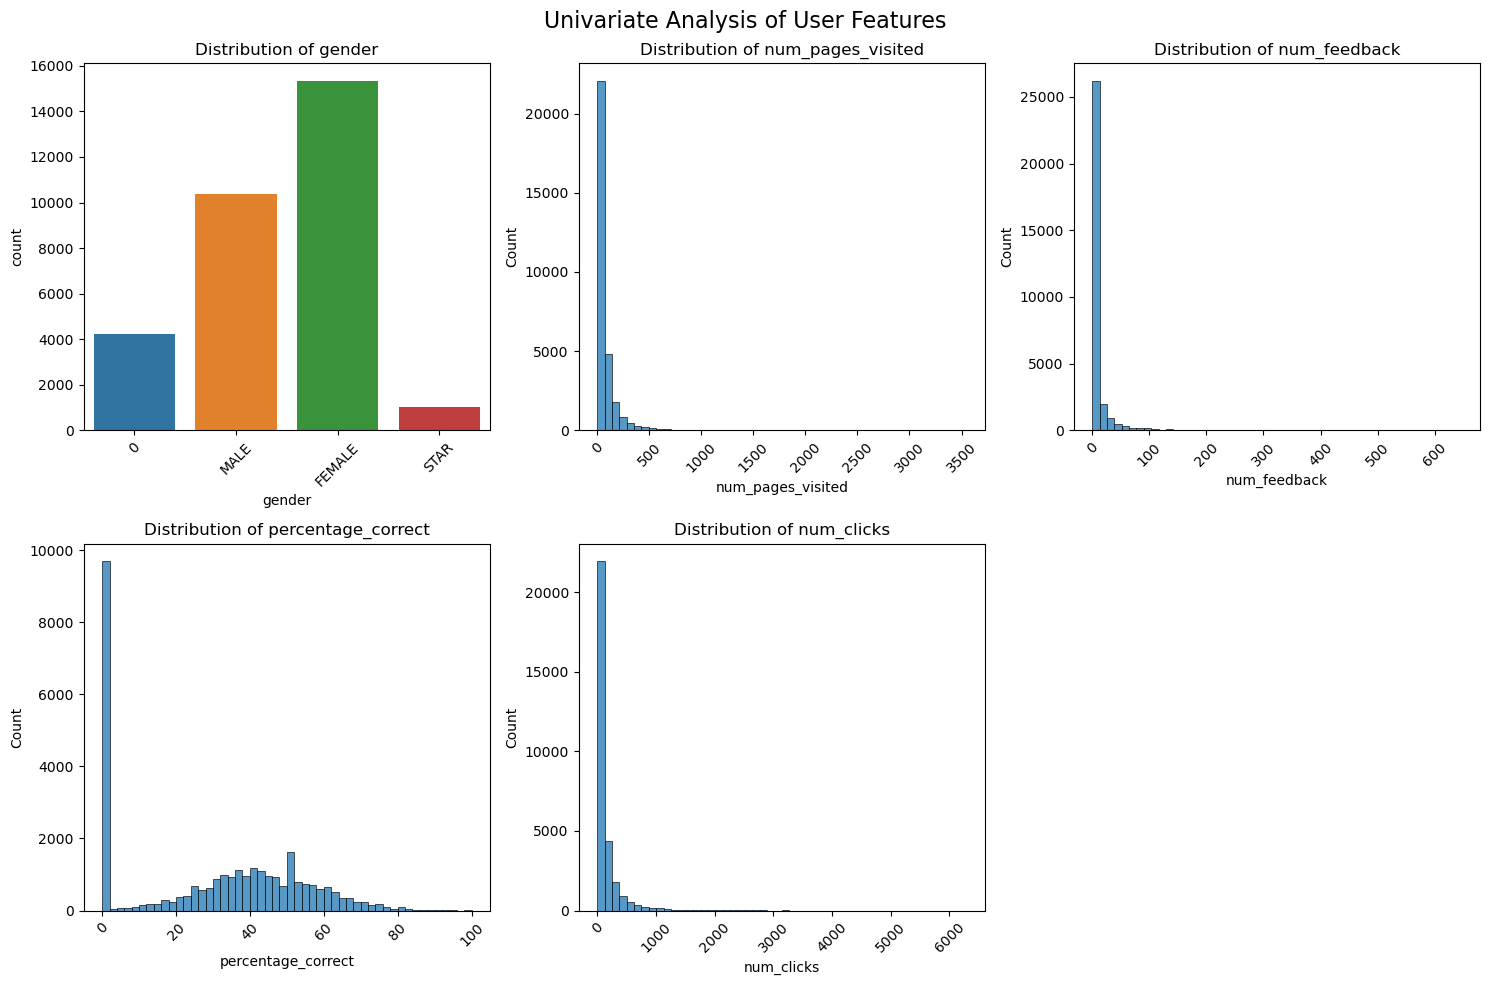

In [75]:
### 1.3

def plot_features(df):
    """
    Plots all features individually in the same figure
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
         
    Hint
    ------
    To have multiple plots in a single figure see pyplot.figure

    """    
    df = df.copy()

    continuous_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

    num_features = len(df.columns)
    cols = 3  # Number of columns
    rows = (num_features // cols) + (num_features % cols > 0)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        if col in continuous_cols:
            sns.histplot(data=df, x=col, bins=50, ax=axes[i])
            axes[i].set_title(f"Distribution of {col}")
        elif col in categorical_cols:
            sns.countplot(data=df, x=col, ax=axes[i])
            axes[i].set_title(f"Distribution of {col}")
        axes[i].set_title(f"Distribution of {col}")
        axes[i].tick_params(axis='x', rotation=45)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Univariate Analysis of User Features", fontsize=16)
    fig.tight_layout()
    plt.show()

plot_features(user_df.drop(columns='user_id'))    

*We observe a right-skewed distribution with a heavy tail for the number of clicks, feedback, and pages visited, indicating that most users have low activity, while a few are highly engaged. Additionally, the high percentage of users with 0% correctness suggests that many users either did not complete their work, submitted empty responses, or never attempted any exercises. This implies the presence of inactive users or outliers in the data. To gain deeper insights, we will apply a log scale transformation to better visualize these distributions and assess engagement patterns more effectively. Let’s explore it! *

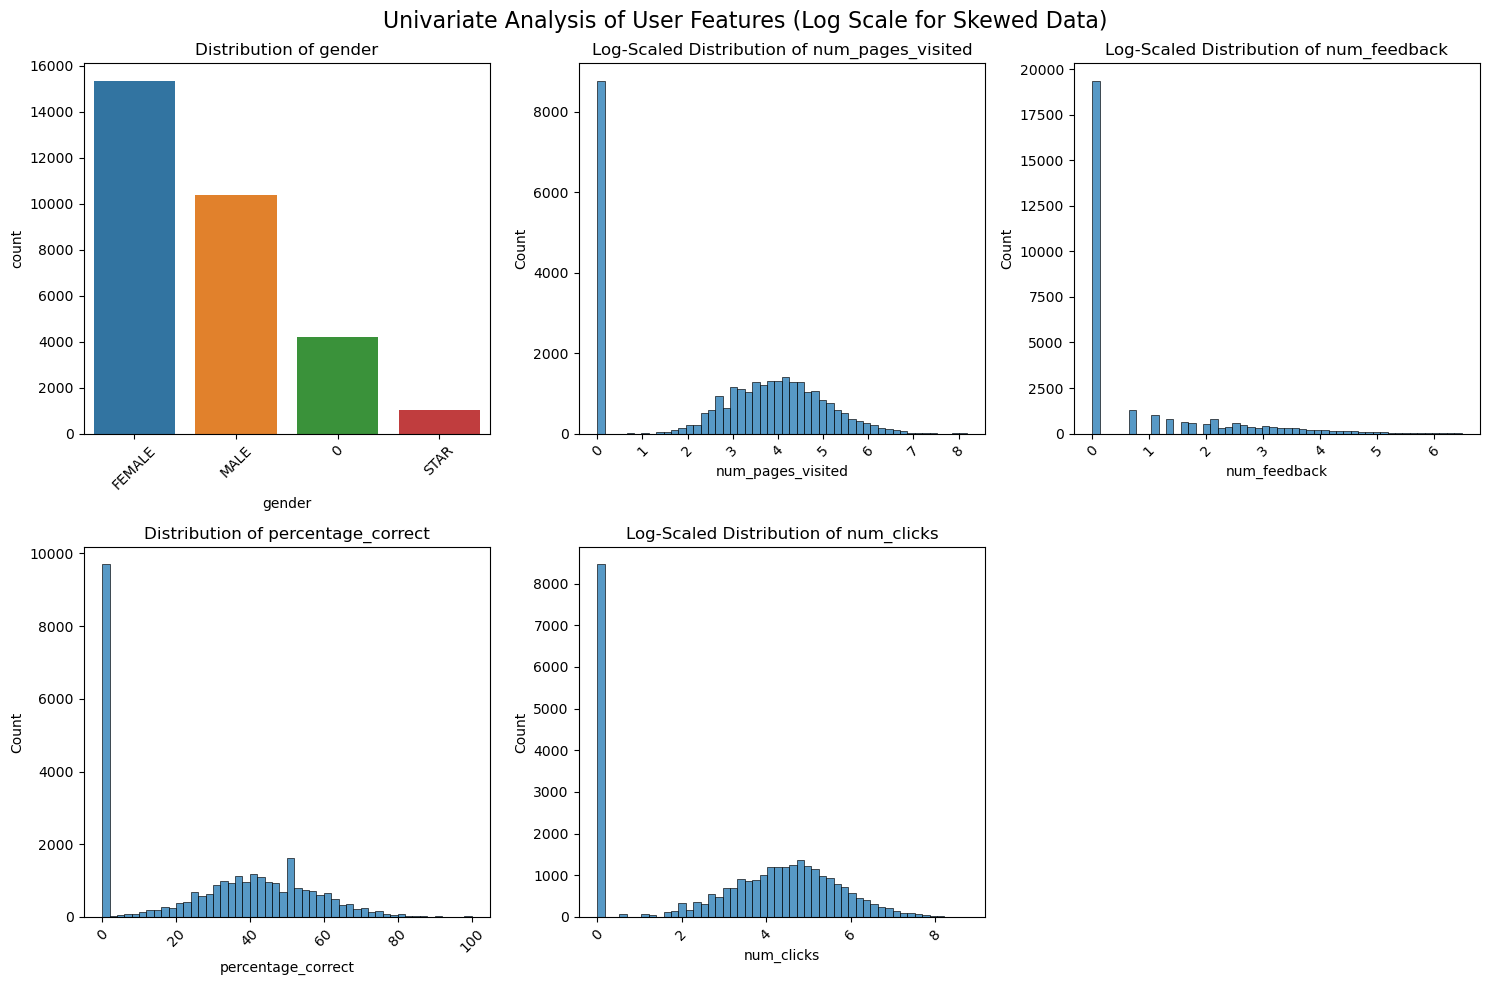

In [76]:
def plot_features_log_scale(df):
    """
    Plots all features individually in the same figure, applying log transformation 
    to right-skewed numerical features.
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
    """    
    df = df.copy()

    # Separate numerical and categorical columns
    continuous_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

    num_features = len(df.columns)
    cols = 3  # Number of columns
    rows = (num_features // cols) + (num_features % cols > 0)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        if col in continuous_cols:
            transformed_data = np.log1p(df[col]) if df[col].skew() > 1 else df[col]
            sns.histplot(transformed_data, bins=50, ax=axes[i])
            axes[i].set_title(f"Log-Scaled Distribution of {col}" if df[col].skew() > 1 else f"Distribution of {col}")
        elif col in categorical_cols:
            sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
            axes[i].set_title(f"Distribution of {col}")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Univariate Analysis of User Features (Log Scale for Skewed Data)", fontsize=16)
    fig.tight_layout()
    plt.show()

plot_features_log_scale(user_df.drop(columns='user_id'))


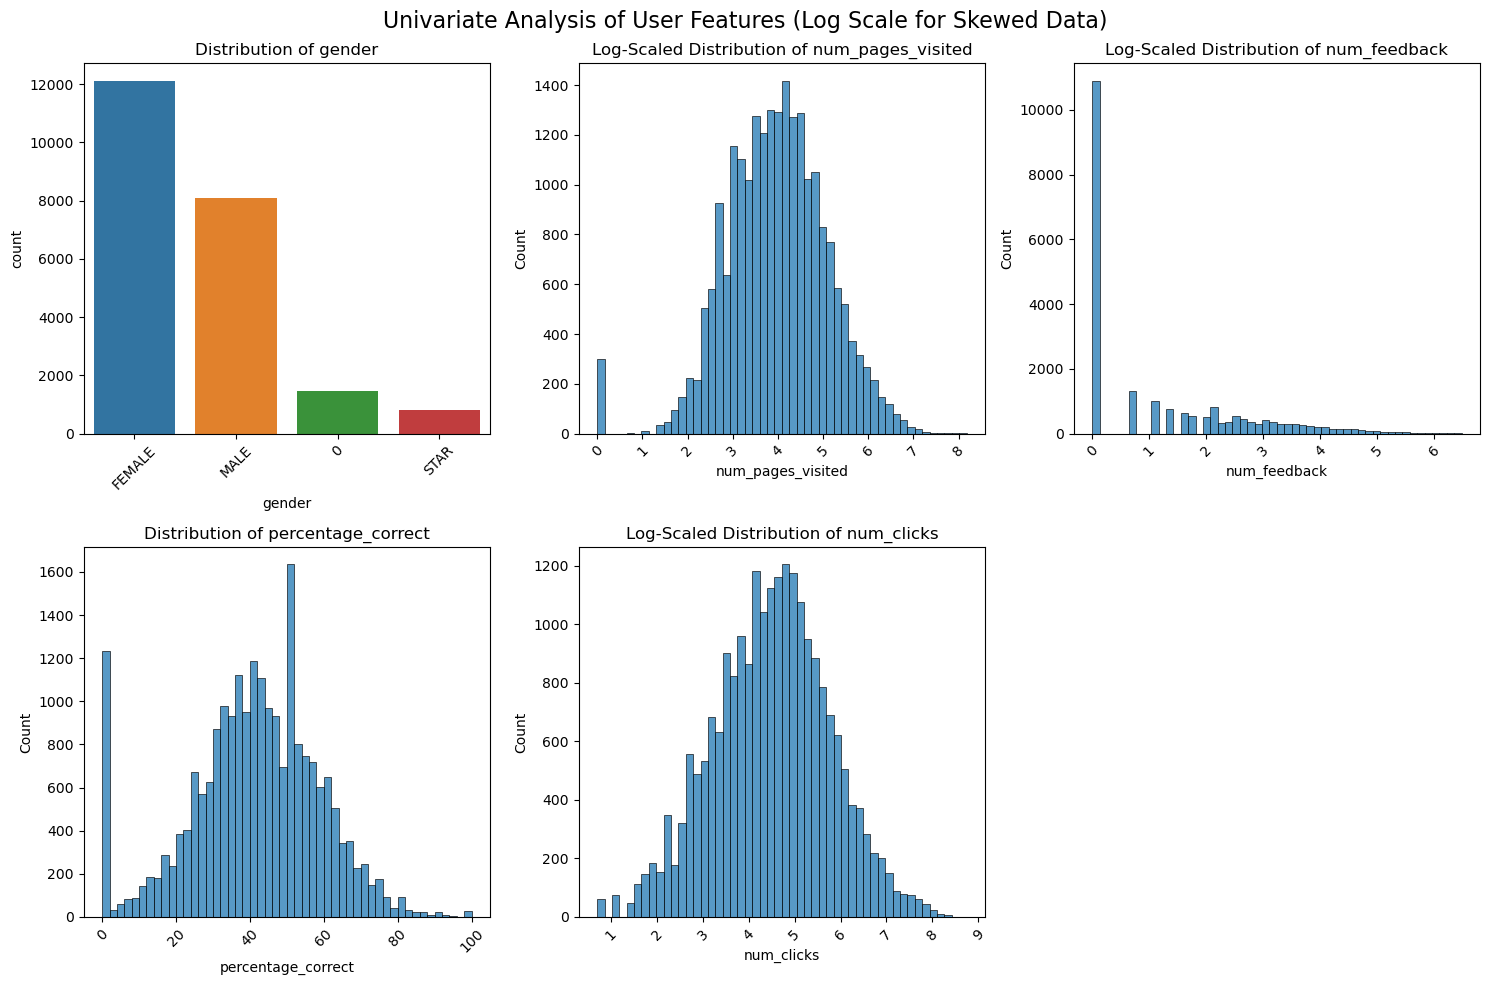

In [77]:
filtered_users_df = user_df[
    (user_df['num_pages_visited'] > 0) |
    (user_df['num_feedback'] > 0) |
    (user_df['num_clicks'] > 0) |
    (user_df['percentage_correct'] > 0)
]
plot_features_log_scale(filtered_users_df.drop(columns='user_id'))


*After applying a log scale transformation and filtering out zero values, the data now appears approximately normally distributed, except for number of feedback, which remains right-skewed. This suggests that most engagement metrics, such as pages visited, clicks, and percentage correct, follow a balanced distribution, while feedback usage varies significantly among users. The skew in feedback indicates that some users rely on it heavily, while others use it minimally or not at all.*

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

In [78]:
# Your code for computing the features and adding them to the df goes here
# participation in the study
new_user_df = user_df.copy()

num_answers_submitted = events[events.action == 'SUBMIT_ANSWER'].groupby('user_id').agg(num_answers_submitted=('user_id', 'count'))
transactions_cleaned = transactions.dropna(subset=['session_type'])

num_sessions_accepted = transactions.groupby('user_id')['session_accepted'].sum().reset_index()
num_sessions_accepted.rename(columns={'session_accepted': 'num_sessions_accepted'}, inplace=True)


new_user_df = new_user_df.merge(num_answers_submitted, on='user_id', how='left').merge(num_sessions_accepted, on='user_id', how='left')

new_user_df['num_answers_submitted'] = new_user_df['num_answers_submitted'].fillna(0)
new_user_df['num_sessions_accepted'] = new_user_df['num_sessions_accepted'].fillna(0).astype(int)




new_user_df



,user_id,gender,num_pages_visited,num_feedback,percentage_correct,num_clicks,num_answers_submitted,num_sessions_accepted
0,387604,0,1341.0,46.0,29.550827,1408.0,361.0,245
1,387605,0,862.0,78.0,28.319502,959.0,239.0,155
2,387608,0,716.0,11.0,26.869806,516.0,117.0,80
3,387613,0,37.0,0.0,33.333333,38.0,4.0,5
4,387615,MALE,211.0,1.0,28.750000,109.0,15.0,6
...,...,...,...,...,...,...,...,...
30924,432018,MALE,0.0,0.0,0.000000,0.0,0.0,0
30925,432020,MALE,27.0,4.0,20.000000,40.0,7.0,10
30926,432021,FEMALE,0.0,0.0,0.000000,0.0,0.0,0
30927,432022,FEMALE,0.0,0.0,0.000000,0.0,0.0,0


### Feature Selection and Justification

We chose to add **number of submitted answers (`num_submitted_answers`)** and **number of accepted sessions (`num_sessions_accepted`)** to the data frame because they might provide valuable insights into user engagement and learning behavior.

The **number of submitted answers** might be a strong indicator of **how actively a user interacts with the platform**. A higher submission count suggests greater participation, and it might be **correlated with the number of feedback interactions**, as users who submit answers may also seek feedback to evaluate their performance.

The **number of accepted sessions** might also reveal differences in user confidence and persistence. We assume that users who **accept more sessions (`session_accepted = 1`)** might be more engaged, as they are satisfied with their results and continue their learning process. In contrast, users who **reject sessions (`session_accepted = 0`)** might be struggling, less confident in their progress, or hesitant to move forward. This could mean that **session acceptance is linked to submission rates and correctness**, with more engaged learners accepting more sessions, while struggling users may reject them more frequently.


d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [79]:
# Ensure session_accepted is an integer (though it's already binary: 0 or 1)
new_user_df['num_sessions_accepted'] = new_user_df['num_sessions_accepted'].astype(int)

numeric_stats = new_user_df[['num_answers_submitted', 'num_sessions_accepted']].describe()

numeric_stats

,num_answers_submitted,num_sessions_accepted
count,30929.000000,30929.000000
mean,45.398881,30.999353
std,96.604779,94.317094
min,0.000000,0.000000
25%,0.000000,0.000000
50%,13.000000,0.000000
75%,49.000000,25.000000
max,1653.000000,7512.000000


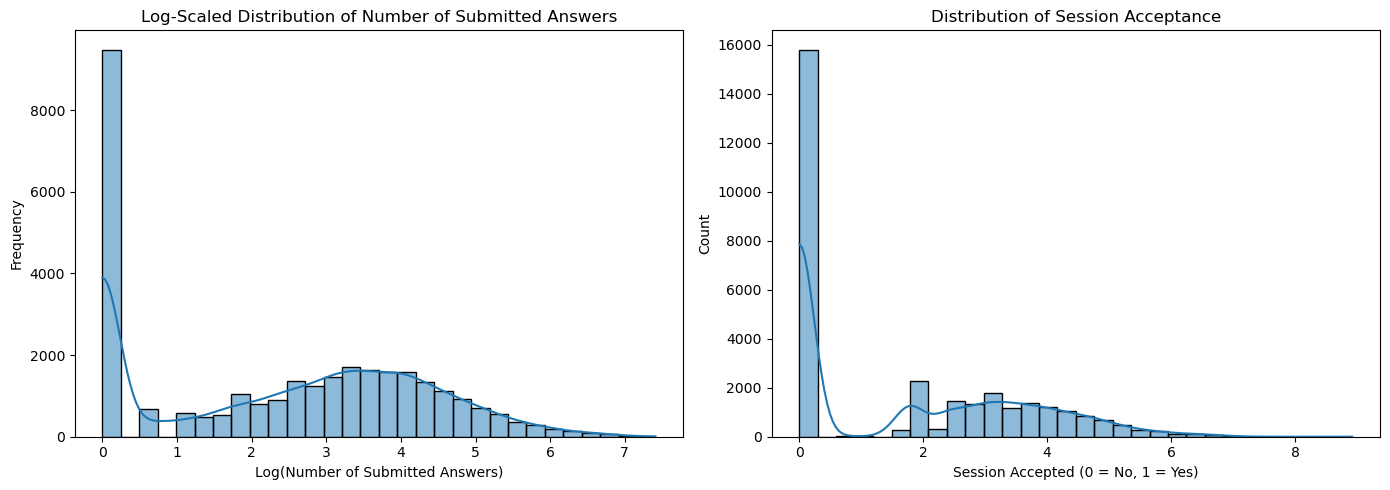

In [80]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Log-scaled histogram for num_answers_submitted (if right-skewed)
sns.histplot(np.log1p(new_user_df['num_answers_submitted']), bins=30, kde=True, ax=axes[0])
axes[0].set_title("Log-Scaled Distribution of Number of Submitted Answers")
axes[0].set_xlabel("Log(Number of Submitted Answers)")
axes[0].set_ylabel("Frequency")

# Bar plot for session acceptance (binary)
sns.histplot(np.log1p(new_user_df['num_sessions_accepted']), bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Session Acceptance")
axes[1].set_xlabel("Session Accepted (0 = No, 1 = Yes)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


*The distributions confirm our hypothesis: most users submit very few answers and accept few or no sessions, indicating low engagement or uncertainty in progress. A small, highly active group submits many answers and accepts multiple sessions, suggesting persistence. This supports the idea that engagement and session acceptance are linked, with less active users being less likely to accept their results.*

In [81]:
new_user_df

,user_id,gender,num_pages_visited,num_feedback,percentage_correct,num_clicks,num_answers_submitted,num_sessions_accepted
0,387604,0,1341.0,46.0,29.550827,1408.0,361.0,245
1,387605,0,862.0,78.0,28.319502,959.0,239.0,155
2,387608,0,716.0,11.0,26.869806,516.0,117.0,80
3,387613,0,37.0,0.0,33.333333,38.0,4.0,5
4,387615,MALE,211.0,1.0,28.750000,109.0,15.0,6
...,...,...,...,...,...,...,...,...
30924,432018,MALE,0.0,0.0,0.000000,0.0,0.0,0
30925,432020,MALE,27.0,4.0,20.000000,40.0,7.0,10
30926,432021,FEMALE,0.0,0.0,0.000000,0.0,0.0,0
30927,432022,FEMALE,0.0,0.0,0.000000,0.0,0.0,0


e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

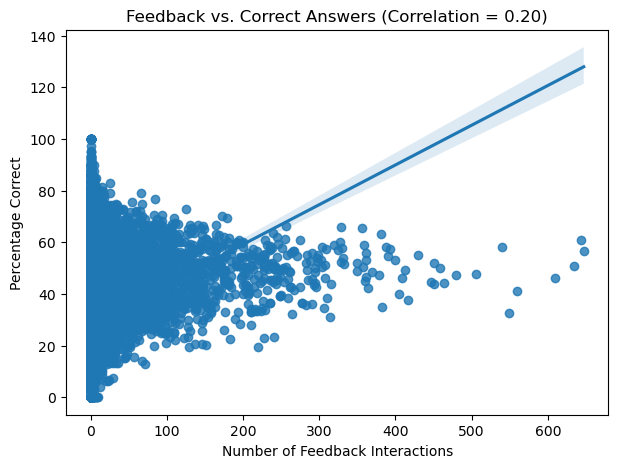

0.19713951690810005

In [82]:
corr_feedback_correct = new_user_df[['num_feedback', 'percentage_correct']].corr().iloc[0, 1]

# Create a scatter plot with regression line
plt.figure(figsize=(7,5))
sns.regplot(data=new_user_df, x='num_feedback', y='percentage_correct')

# Add title and correlation value
plt.title(f"Feedback vs. Correct Answers (Correlation = {corr_feedback_correct:.2f})")
plt.xlabel("Number of Feedback Interactions")
plt.ylabel("Percentage Correct")

# Show plot
plt.show()

# Display correlation value
corr_feedback_correct

**Hypothesis for Multivariate Analysis**
To explore relationships in user behavior, we selected two feature pairs that may reveal key insights about engagement, performance, and confidence levels.

 `num_feedback` vs. `percentage_correct`
- **Hypothesis:** Students who seek **more feedback** are likely to perform **better**, meaning we expect a **positive correlation** between the number of feedback interactions and the percentage of correct answers. Users who frequently open feedback may be **more invested in learning**, using the feedback as a tool to refine their responses and improve their accuracy over time. If this correlation exists, it would suggest that **feedback usage is an important factor in learning success**.


The results partially support our hypothesis, showing a weak positive correlation (0.20) between feedback usage and correctness. While students who seek more feedback tend to perform slightly better, the effect is not strong, suggesting that feedback alone is not a major factor in improving correctness. Other influences might play a bigger role. 


In [83]:
from scipy.stats import ttest_ind

def analyze_gender_vs_percentage_correct(df):
    """
    Compares 'percentage_correct' across gender categories (e.g., MALE, FEMALE).
    Produces a box plot and conducts a t-test for significance (MALE vs. FEMALE).
    """
    
    # Drop rows with missing or invalid values in relevant columns
    df_filtered = df.dropna(subset=['gender', 'percentage_correct'])
    
    # Optional: Filter only MALE and FEMALE rows (if you want a straightforward two-group comparison)
    df_filtered = df_filtered[df_filtered['gender'].isin(['MALE', 'FEMALE'])]
    
    # Create a box plot to visualize the distribution of 'percentage_correct' by gender
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df_filtered, x='gender', y='percentage_correct')
    plt.title("Comparison of Percentage Correct by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Percentage Correct")
    plt.show()
    
    # Group by gender and compute descriptive statistics
    group_stats = df_filtered.groupby('gender')['percentage_correct'].describe()
    print("Descriptive Statistics by Gender:")
    print(group_stats, "\n")
    
    # Conduct a t-test between MALE and FEMALE
    female_scores = df_filtered[df_filtered['gender'] == 'FEMALE']['percentage_correct']
    male_scores = df_filtered[df_filtered['gender'] == 'MALE']['percentage_correct']
    
    t_stat, p_val = ttest_ind(female_scores, male_scores, equal_var=False, nan_policy='omit')
    
    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value: {p_val:.3e}")
    if p_val < 0.05:
        print("\nStatistically significant difference at the 5% level.")
    else:
        print("\nNo statistically significant difference at the 5% level.")



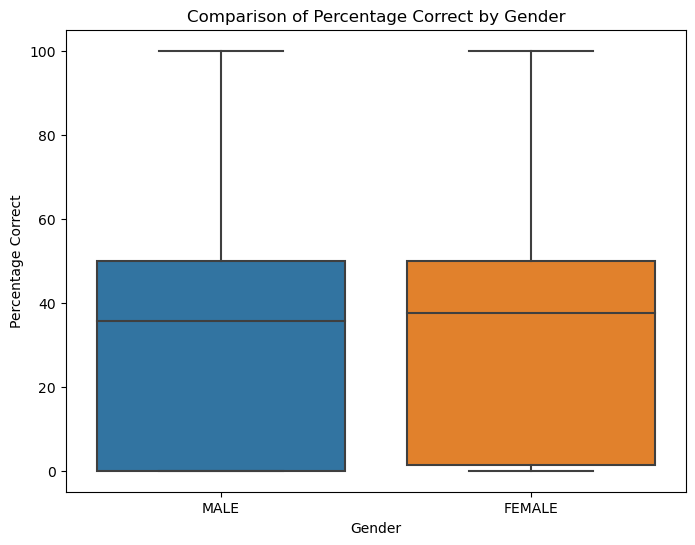

Descriptive Statistics by Gender:
          count       mean        std  min       25%        50%   75%    max
gender                                                                      
FEMALE  15342.0  33.263804  23.087265  0.0  1.271645  37.500000  50.0  100.0
MALE    10364.0  31.767365  23.005384  0.0  0.000000  35.714286  50.0  100.0 

t-statistic: 5.109
p-value: 3.274e-07

Statistically significant difference at the 5% level.


In [84]:
analyze_gender_vs_percentage_correct(new_user_df)

We hypothesize that female users have a higher average score on percentage_correct compared to male users. 

To test this, we first visualize the distribution of percentage_correct using a box plot, allowing us to quickly compare medians and the spread of scores by gender. Next, we perform a t-test (ttest_ind) to determine whether any observed difference in mean percentage_correct is statistically significant. In this analysis, the resulting p-value was 3.274e-07, which falls far below the 0.05 threshold—strong evidence in support of our hypothesis that female users outperform male users. However, as with any statistical inference, we need further investigation to understand this difference.

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_pages_visited, num_feedback, percentage_correct, num_clicks]``


The features are defined as follows:

- **num_pages_visited**: total number of pages a student visited 

- **num_feedback**: total number of times the student opened the feedback

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_clicks**: total number of click events (hint: event_type = CLICK)

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps.

Hint 2: Be mindful that week 1 in 2022 is a different week from week 1 in 2023.

In [31]:
columns_to_keep = [
    'transaction_id',
    'transaction_token',
    'user_id',
    'commit_time',
    'evaluation'
]

transactions_small = transactions[columns_to_keep].copy()

In [32]:
transactions_small.commit_time = pd.to_datetime(transactions_small.commit_time)
transactions_small['year'] = transactions_small.commit_time.dt.year
transactions_small['week_year'] = transactions_small.commit_time.dt.isocalendar().week

transactions_small['continuous_week'] = (transactions_small['year'] - transactions_small['year'].min()) * 52 + transactions_small['week_year']  

user_first_week = transactions_small.groupby('user_id')['continuous_week'].min().reset_index()
user_first_week.rename(columns={'continuous_week': 'first_week'}, inplace=True)

transactions_small = transactions_small.merge(user_first_week, on='user_id', how='left')
transactions_small['week'] = transactions_small['continuous_week'] - transactions_small['first_week'] 

transactions_small


,transaction_id,transaction_token,user_id,commit_time,evaluation,year,week_year,continuous_week,first_week,week
0,688413,88fdcaad-f73b-46a2-b561-d262f2441442,393211,2021-05-21 08:03:43.020000000,PARTIAL,2021.0,20,20.0,20.0,0.0
1,688414,a75eb7b4-b2c2-47d4-9200-27980c175037,393211,2021-05-21 08:07:21.288999936,PARTIAL,2021.0,20,20.0,20.0,0.0
2,688415,61eb829d-bdda-4107-86af-ad9a14a7bdc9,393211,2021-05-21 08:13:30.953999872,PARTIAL,2021.0,20,20.0,20.0,0.0
3,688416,30ff0d8a-865d-460b-9177-b698a52b0d5c,393211,2021-05-21 08:22:13.975000064,CORRECT,2021.0,20,20.0,20.0,0.0
4,688417,0adedf3b-ba35-4497-8c6b-b5c2f6fcbbf3,393211,2021-05-21 08:22:55.366000128,CORRECT,2021.0,20,20.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2134754,3936487,ad7bbba0-1fba-4f53-bd3e-57dec3a44df3,387682,2023-02-06 01:07:19.062000128,WRONG,2023.0,6,110.0,47.0,63.0
2134755,3936488,2eb9b3b3-f65d-4618-bbeb-21db620c3737,387682,2023-02-06 01:08:18.399000064,CORRECT,2023.0,6,110.0,47.0,63.0
2134756,3936489,35eee551-0197-46b3-9151-8bcb93a23bd2,387682,2023-02-06 01:09:18.332000000,CORRECT,2023.0,6,110.0,47.0,63.0
2134757,3936490,39b80533-7093-4c81-90d3-c54d01c2b401,387682,2023-02-06 01:10:14.984000000,CORRECT,2023.0,6,110.0,47.0,63.0


In [33]:
# Count how many CORRECT answers per (user_id, relative_week)
transaction_correct = transactions_small[transactions_small['evaluation'] == 'CORRECT'].groupby(['user_id', 'week']).agg(correct=('user_id', 'count')).reset_index()
transaction_partial = transactions_small[transactions_small['evaluation'] == 'PARTIAL'].groupby(['user_id', 'week']).agg(partial_correct=('user_id', 'count')).reset_index()
# Count total transactions (answers) per (user_id, relative_week)
total_answers = transactions_small.groupby(['user_id', 'week']).agg(total=('user_id', 'count')).reset_index()

percentage_correct = (
    total_answers
    .merge(transaction_correct, on=['user_id', 'week'], how='left')
    .merge(transaction_partial, on=['user_id', 'week'], how='left')
    .fillna(0)
)

percentage_correct['percentage_correct'] = (
    (percentage_correct['correct'] 
     + 0.5 * percentage_correct['partial_correct'])
    / percentage_correct['total']
    * 100
)

percentage_correct = percentage_correct[[
    'user_id', 
    'week', 
    'percentage_correct'
]]

In [34]:
events.columns

Index(['event_id', 'user_id', 'event_date', 'category', 'action', 'event_type',
       'transaction_token', 'tracking_data', 'session_id', 'topic_id',
       'session_closed', 'session_type', 'session_accepted'],
      dtype='object')

In [38]:
columns_to_keep = ['event_id', 'user_id', 'action', 'transaction_token', 'event_type']
new_events_df = events[columns_to_keep].copy()
new_events_df = new_events_df.merge(transactions_small[['transaction_token', 'week']], on='transaction_token', how='left')

In [39]:
num_pages_visited = new_events_df[new_events_df.action == 'PAGE_VISIT'].groupby(['user_id', 'week']).agg(num_pages_visited=('user_id', 'count')).reset_index()
num_feedback = new_events_df[new_events_df.action == 'OPEN_FEEDBACK'].groupby(['user_id', 'week']).agg(num_feedback=('user_id', 'count')).reset_index()
num_clicks = new_events_df[new_events_df.event_type == 'CLICK'].groupby(['user_id', 'week']).agg(num_clicks=('user_id', 'count')).reset_index()

base_weeks = pd.concat([
    num_pages_visited[['user_id', 'week']],
    num_feedback[['user_id', 'week']],
    num_clicks[['user_id', 'week']],
    percentage_correct[['user_id', 'week']]
]).drop_duplicates()

base_weeks = base_weeks.sort_values(['user_id','week'])


base_weeks.head()


,user_id,week
0,387604,0.0
1,387604,9.0
2,387604,12.0
3,387604,13.0
4,387604,14.0


In [65]:
# Start with base_weeks
merged_df = base_weeks.merge(num_pages_visited, on=['user_id','week'], how='left')
merged_df = merged_df.merge(num_feedback, on=['user_id','week'], how='left')
merged_df = merged_df.merge(num_clicks, on=['user_id','week'], how='left')
merged_df = merged_df.merge(percentage_correct, on=['user_id','week'], how='left')

In [44]:
merged_df

,user_id,week,num_pages_visited,num_feedback,num_clicks,percentage_correct
0,387604,0.0,NaN,NaN,6.0,0.000000
1,387604,9.0,NaN,NaN,13.0,0.000000
2,387604,12.0,NaN,NaN,4.0,12.500000
3,387604,13.0,NaN,NaN,2.0,75.000000
4,387604,14.0,NaN,NaN,1.0,50.000000
...,...,...,...,...,...,...
67548,431999,0.0,NaN,1.0,10.0,62.500000
67549,432001,0.0,NaN,NaN,11.0,60.000000
67550,432014,0.0,NaN,1.0,15.0,66.666667
67551,432016,0.0,NaN,NaN,9.0,60.000000


You can limit the number of weeks to 10, i.e. for each user we just look at the first 10 weeks of data.
You may change and justify your choice for the number of weeks.

#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

I choose to plot performance and feedback as I think that as the weeks progress, users become more proficient, so the percentage of correct answers (percentage_correct) increases over time. Moreover I suppose that the use of feedback (num_feedback) increases as users realize it helps them improve their results. If feedback usage rises, it might correlate with or help explain better performance.


In [59]:
merged_df = merged_df[merged_df['week'] < 52]

merged_df['week'] = merged_df['week'].astype(int)

# Group by week to compute the average (or sum) of each metric across users
weekly_summary = (
    merged_df
    .groupby('week', as_index=False)
    .agg({
        'num_feedback': 'mean',
        'percentage_correct': 'mean'
    })
    .rename(columns={
        'num_feedback': 'avg_feedback',
        'percentage_correct': 'avg_percentage_correct'
    })
)

weekly_summary.head()

/var/folders/67/6c4p9l3d6gz7mdpq5tr7rk7w0000gn/T/ipykernel_89340/493105622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['week'] = merged_df['week'].astype(int)


,week,avg_feedback,avg_percentage_correct
0,0,8.399226,59.769756
1,1,11.331492,58.854959
2,2,11.911300,58.548720
3,3,11.445596,57.537227
4,4,11.119772,55.758526


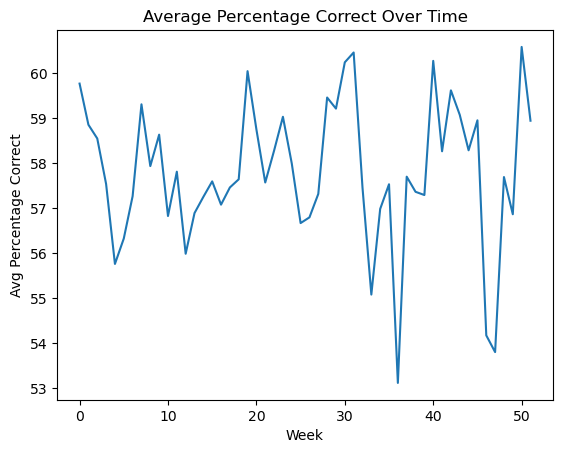

In [60]:
plt.figure()
plt.plot(weekly_summary['week'], weekly_summary['avg_percentage_correct'])
plt.xlabel('Week')
plt.ylabel('Avg Percentage Correct')
plt.title('Average Percentage Correct Over Time')
plt.show()


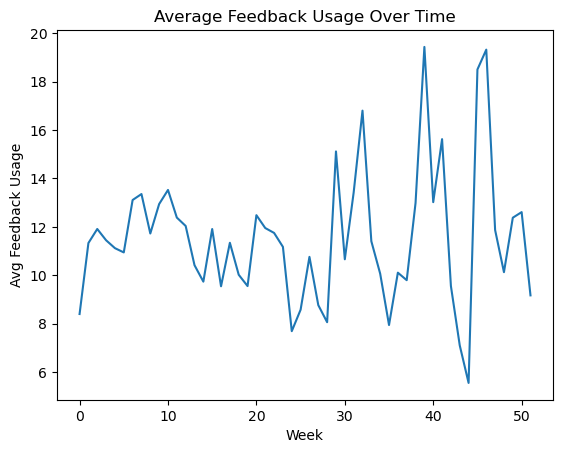

In [61]:
plt.figure()
plt.plot(weekly_summary['week'], weekly_summary['avg_feedback'])
plt.xlabel('Week')
plt.ylabel('Avg Feedback Usage')
plt.title('Average Feedback Usage Over Time')
plt.show()


After focusing on the first year (~52 weeks) of activity for each user, we see that the average percentage correct generally stays in the 53–60% range, with occasional spikes and dips. These fluctuations could reflect tougher new chapters, breaks in study routines (e.g., vacations), or a varying number of active learners. Such swings alone don’t validate or refute our hypotheses—rather, they suggest we need more context (like course difficulty or holiday periods) since the data may be unbalanced at certain points.

Within the first 52 weeks, feedback usage generally stays in a moderate range (around 8–15 requests per week), with occasional surges likely tied to tougher topics or extra support needs. These fluctuations alone don’t fully explain differences in performance; we’d need to account for other factors—like the intensity of coursework, study habits, or the academic calendar—to gain a more complete picture of how feedback usage interacts with correctness.

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



One new hypothesis we would like to explore is that most new users drop off after their first few weeks on the platform, leaving a smaller subset of highly engaged users who remain active over time. Rather than focusing solely on raw performance metrics, this analysis examines how many users return to the platform week after week. 



In [68]:
merged_df['week'] = merged_df['week'].astype(int)
df = merged_df.copy()
user_weeks = df.groupby('user_id')['week'].agg(['min','max']).reset_index()

week_range = range(df['week'].min(), df['week'].max()+1)
retention = []
for w in week_range:
    active_count = ((user_weeks['min'] <= w) & (user_weeks['max'] >= w)).sum()
    retention.append({'week': w, 'active_users': active_count})

retention_df = pd.DataFrame(retention)

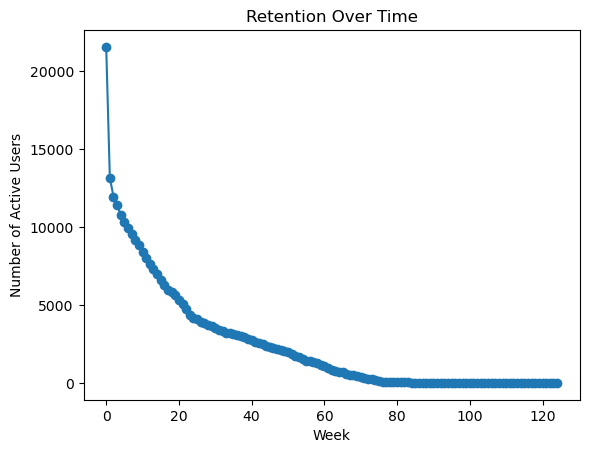

In [ ]:
plt.figure()
plt.plot(retention_df['week'], retention_df['active_users'], marker='o')
plt.xlabel('Week')
plt.ylabel('Number of Active Users')
plt.title('Retention Over Time')
plt.show()

The retention curve shows a sharp decline from over 20,000 active users in the initial week to under 5,000 by Week 20, after which participation steadily tapers down to a smaller, highly dedicated group. This pattern indicates that many students either complete their learning goals or disengage early, while a committed subset remains active over time. External factors—such as vacation periods, increasing course difficulty, or competing commitments—could further accelerate dropout rates. Overall, these findings highlight the need to examine why learners stop participating and to refine the course or platform in ways that better sustain long-term engagement.